## Problem Set 5




### Classification

### IMT 574 - Machine Learning & Econometrics

#### Yash Mehta

World Values Survey Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## Explore & Prepare the Data

### Loading the Data

In [11]:
data_wvs = pd.read_csv("wvs.csv", sep='\t')

In [12]:
data_wvs.head()

,V2,V4,V5,V6,V7,V8,V9,V10,V11,V12,...,MN_228S8,MN_229A,MN_230A,MN_233A,MN_237B1,MN_249A1,MN_249A3,I_RELIGBEL,I_NORM1,I_VOICE1
0,12,1,1,1,-2,1,1,2,1,1,...,3,-3,-3,-3,-3,1,1,0.0,1.0,0.00
1,12,1,2,3,4,2,2,2,2,2,...,3,-3,-3,-3,-3,2,-1,0.0,1.0,0.66
2,12,1,3,2,4,2,1,2,2,2,...,4,1,1,2,-3,1,1,0.0,1.0,0.33
3,12,1,1,3,4,3,1,2,1,2,...,2,2,1,2,-3,1,2,0.0,1.0,0.00
4,12,1,1,1,2,1,1,1,3,2,...,2,2,1,2,-3,1,2,0.0,1.0,0.66


### Create a summary table

In [83]:
data_wvs.shape


,country,V4,V5,V6,V7,V8,V9,V10,V11,V12,...,MN_229A,MN_230A,MN_233A,MN_237B1,MN_249A1,MN_249A3,I_RELIGBEL,I_NORM1,I_VOICE1,abortion
count,79267.000000,79267.000000,79267.000000,79267.000000,79267.000000,79267.000000,79267.000000,79267.000000,79267.000000,79267.000000,...,79267.000000,79267.000000,79267.000000,79267.000000,79267.000000,79267.000000,79267.000000,79267.000000,79267.000000,79267.000000
mean,463.059054,1.097935,1.667945,1.851767,2.571776,1.471091,1.856195,1.811826,2.065412,1.479632,...,-3.512319,-3.636949,-3.579712,-3.858213,-3.578160,-3.582449,0.315238,0.467017,0.337433,0.363733
std,247.769472,0.392617,0.761947,0.884780,1.067100,0.917788,1.087241,0.761601,0.867091,0.503287,...,1.574501,1.325860,1.580421,0.627439,1.421441,1.413258,0.464614,0.498914,0.316637,0.481076
min,12.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,...,-4.000000,-4.000000,-4.000000,-4.000000,-5.000000,-5.000000,0.000000,0.000000,0.000000,0.000000
25%,275.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,0.000000,0.000000,0.000000,0.000000
50%,434.000000,1.000000,2.000000,2.000000,3.000000,1.000000,1.000000,2.000000,2.000000,1.000000,...,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,0.000000,0.000000,0.330000,0.000000
75%,702.000000,1.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,...,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,1.000000,1.000000,0.660000,1.000000
max,887.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,...,2.000000,2.000000,5.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
#The total number of rows are 90350

In [84]:
data_wvs.describe()

,country,V4,V5,V6,V7,V8,V9,V10,V11,V12,...,MN_229A,MN_230A,MN_233A,MN_237B1,MN_249A1,MN_249A3,I_RELIGBEL,I_NORM1,I_VOICE1,abortion
count,79267.000000,79267.000000,79267.000000,79267.000000,79267.000000,79267.000000,79267.000000,79267.000000,79267.000000,79267.000000,...,79267.000000,79267.000000,79267.000000,79267.000000,79267.000000,79267.000000,79267.000000,79267.000000,79267.000000,79267.000000
mean,463.059054,1.097935,1.667945,1.851767,2.571776,1.471091,1.856195,1.811826,2.065412,1.479632,...,-3.512319,-3.636949,-3.579712,-3.858213,-3.578160,-3.582449,0.315238,0.467017,0.337433,0.363733
std,247.769472,0.392617,0.761947,0.884780,1.067100,0.917788,1.087241,0.761601,0.867091,0.503287,...,1.574501,1.325860,1.580421,0.627439,1.421441,1.413258,0.464614,0.498914,0.316637,0.481076
min,12.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,...,-4.000000,-4.000000,-4.000000,-4.000000,-5.000000,-5.000000,0.000000,0.000000,0.000000,0.000000
25%,275.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,0.000000,0.000000,0.000000,0.000000
50%,434.000000,1.000000,2.000000,2.000000,3.000000,1.000000,1.000000,2.000000,2.000000,1.000000,...,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,0.000000,0.000000,0.330000,0.000000
75%,702.000000,1.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,...,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,1.000000,1.000000,0.660000,1.000000
max,887.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,...,2.000000,2.000000,5.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
data_wvs['V204'].value_counts()

 1     40227
 5      9580
 2      7896
 3      6294
 4      4497
 6      4395
 10     4067
 7      3493
 8      3397
-1      2017
 9      1896
-4      1523
-2      1045
-5        23
Name: V204, dtype: int64

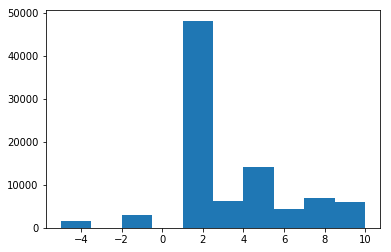

In [17]:
plt.hist(data_wvs['V204'])
plt.show()

from the 90350 responses, almost 50% felt that abortion was not justifiable. Also 95% of the respondents had non missing value. 

### Remove Missings


There are no negative values for V2 variable. Hence, no removals there. Below, we remove all negative values for V204.

In [22]:
data_wvs = data_wvs[data_wvs['V204']>0]

In [23]:
len(data_wvs)

85742

We are left with 85742 rows after the removal of negative values from V204 & V2.



In [85]:
#using the dropna function
data_wvs.isnull().sum()

data_wvs= data_wvs.dropna()

In [86]:
#using the shape function to get the number of rows and columns 
data_wvs.shape

(79267, 329)

After removing null values there are 79267 rows

### Creation of binary variable 

In [28]:
#using the where function to assign a value based on the condition
data_wvs['abortion'] = np.where(data_wvs['V204']>3, 1, 0)

In [29]:
data_wvs['abortion'].value_counts()

0    50435
1    28832
Name: abortion, dtype: int64

### Correlation table

In [50]:
#correlation of abortion
cor = data_wvs.corrwith(data_wvs['abortion'])

In [57]:
cor = cor.reset_index()
cor.columns = ['Variable','Correlation'] #giving column headers
cor.head(10)


,Variable,Correlation
0,V2,0.038487
1,V4,0.051921
2,V5,-0.028951
3,V6,-0.070634
4,V7,0.003503
5,V8,0.075076
6,V9,0.314117
7,V10,0.020985
8,V11,0.025678
9,V12,-0.077677


Now, we check strong correlation between variables and abortion

In [52]:
#top 10 positive correlated values
cor.sort_values(kind="quicksort",ascending=False).head(10)


abortion    1.000000
V204        0.881048
V205        0.548653
V203        0.485419
V206        0.446394
V207        0.418271
V9          0.314117
V203A       0.291576
V146        0.272220
V210        0.257035
dtype: float64

In [56]:
#top 10 negative correlated values
cor.sort_values(kind="quicksort",ascending=True).head(10)

V152   -0.315280
V252   -0.191483
V223   -0.165924
V255   -0.149844
V138   -0.142894
V132   -0.140972
V222   -0.140166
V107   -0.134199
V106   -0.121063
V217   -0.117946
dtype: float64

In [58]:
#considering variables greater than 0.3 as strongly positive correlated variables
cor[cor['Correlation']>0.3]

,Variable,Correlation
6,V9,0.314117
226,V203,0.485419
228,V204,0.881048
229,V205,0.548653
230,V206,0.446394
231,V207,0.418271
328,abortion,1.000000


In [59]:
#considering variables less than -0.3 as strongle negatively correlated 
cor[cor['Correlation']<-0.3]

,Variable,Correlation
165,V152,-0.31528


Strongly positive corelated variables

V9 - Religion: Importance in life V203 - Justifiable: Homosexuality V205 - Justifiable: Divorce V206 - Justifiable: Sex before marriage V207 - Justifiable: Suicide

Strongly negatively correlated variables

V12 - Important child qualities: independence

In [87]:
#renaming V2 as country
data_wvs = data_wvs.rename(columns = {"V2": "country"}) 
#removing multicollinearity
data_wvs_new=pd.get_dummies(data_wvs,columns=['country'], drop_first=True)
data_wvs_new.head()

,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,...,country_752,country_764,country_780,country_788,country_792,country_804,country_840,country_858,country_860,country_887
0,1,1,1,-2,1,1,2,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,2,3,4,2,2,2,2,2,1,...,0,0,0,0,0,0,0,0,0,0
2,1,3,2,4,2,1,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
3,1,1,3,4,3,1,2,1,2,2,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,2,1,1,1,3,2,1,...,0,0,0,0,0,0,0,0,0,0


In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [90]:
scaler.fit(data_wvs_new.drop('abortion',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [97]:
#feature trasnformation
new_scaled_features=scaler.transform(data_wvs_new.drop(['abortion'],axis=1))

In [98]:
new_col=data_wvs_new.columns
#dropping abortion column 
new_col=new_col.drop('abortion')
new_feat = pd.DataFrame(new_scaled_features,columns=new_col)
new_feat.head()

,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,...,country_752,country_764,country_780,country_788,country_792,country_804,country_840,country_858,country_860,country_887
0,-0.249442,-0.876634,-0.962694,-4.284327,-0.513293,-0.787498,0.247078,-1.228728,-0.953006,-0.807323,...,-0.118955,-0.118079,-0.108898,-0.114739,-0.139354,-0.138883,-0.166332,-0.102365,-0.12852,-0.101861
1,-0.249442,0.435800,1.297769,1.338424,0.576290,0.132267,0.247078,-0.075439,1.033946,-0.807323,...,-0.118955,-0.118079,-0.108898,-0.114739,-0.139354,-0.138883,-0.166332,-0.102365,-0.12852,-0.101861
2,-0.249442,1.748235,0.167538,1.338424,0.576290,-0.787498,0.247078,-0.075439,1.033946,1.227788,...,-0.118955,-0.118079,-0.108898,-0.114739,-0.139354,-0.138883,-0.166332,-0.102365,-0.12852,-0.101861
3,-0.249442,-0.876634,1.297769,1.338424,1.665873,-0.787498,0.247078,-1.228728,1.033946,1.227788,...,-0.118955,-0.118079,-0.108898,-0.114739,-0.139354,-0.138883,-0.166332,-0.102365,-0.12852,-0.101861
4,-0.249442,-0.876634,-0.962694,-0.535826,-0.513293,-0.787498,-1.065953,1.077850,1.033946,-0.807323,...,-0.118955,-0.118079,-0.108898,-0.114739,-0.139354,-0.138883,-0.166332,-0.102365,-0.12852,-0.101861


In [94]:
from sklearn.model_selection import train_test_split
scaler=StandardScaler()

In [125]:
xtrain, xtest, ytrain, ytest = train_test_split(new_scaled_features,data_wvs_new['abortion'],train_size=0.1,test_size=0.05,random_state=50)

In [126]:
#importing the Classifier
from sklearn.neighbors import KNeighborsClassifier

### KNN

In [127]:
#trying 3 different k values(3,4,7)
knn3 = KNeighborsClassifier(3, n_jobs=-1)
knn3.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
           weights='uniform')

In [128]:
knn4 = KNeighborsClassifier(4, n_jobs=-1)
knn4.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='uniform')

In [129]:
knn7 = KNeighborsClassifier(7, n_jobs=-1)
knn7.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=7, p=2,
           weights='uniform')

In [130]:
#predictions
pred_knn3=knn3.predict(xtest)
pred_knn4=knn4.predict(xtest)
pred_knn7=knn7.predict(xtest)

In [131]:
from sklearn.metrics import classification_report, confusion_matrix

In [132]:
print(confusion_matrix(ytest,pred_knn3))
print("for knn when n==3")
print(classification_report(ytest,pred_knn3))
print("------------------------------------")
print("for knn when n==4")
print(classification_report(ytest,pred_knn4))
print("------------------------------------")
print("for knn when n==7")
print(classification_report(ytest,pred_knn7))

[[2176  376]
 [ 434  978]]
for knn when n==3
             precision    recall  f1-score   support

          0       0.83      0.85      0.84      2552
          1       0.72      0.69      0.71      1412

avg / total       0.79      0.80      0.79      3964

------------------------------------
for knn when n==4
             precision    recall  f1-score   support

          0       0.80      0.90      0.85      2552
          1       0.77      0.59      0.67      1412

avg / total       0.79      0.79      0.78      3964

------------------------------------
for knn when n==7
             precision    recall  f1-score   support

          0       0.83      0.86      0.85      2552
          1       0.73      0.67      0.70      1412

avg / total       0.79      0.80      0.79      3964



### confusion matrix and performance measure

In [133]:


def perf_measure(pred_values, test_values):
    
    
    pred_values = np.array(pred_values)
    test_values = np.array(test_values)
    #initialising all the metrics to 0
    true_positives=0
    true_negatives=0
    false_positives=0
    false_negatives=0
    
    for i in range(0,len(pred_values)):
        if (pred_values[i] == 0 and test_values[i] == 0):
            true_negatives = true_negatives + 1
        elif (pred_values[i] == 1 and test_values[i] == 1):
            true_positives = true_positives + 1
        elif (pred_values[i] == 1 and test_values[i] == 0):
            false_positives = false_positives + 1
        else:
            false_negatives = false_negatives + 1
        
    
    accuracy = 100*(true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives) 
    precision = 100*true_positives / (true_positives + false_positives)
    recall = 100*true_positives / (true_positives + false_negatives)
    f1_score = 2*precision*recall / (precision+recall)
    
    print("Results:\n----------------------------")
    print("Accuracy:", round(accuracy,2), "%")
    print("Precision:", round(precision,2), "%")
    print("Recall:", round(recall,2), "%")
    print("F1 Score:", round(f1_score,2), "%")   

    return None

In [134]:
print(perf_measure(pred_knn3,ytest))
print(perf_measure(pred_knn4,ytest))
print(perf_measure(pred_knn7,ytest))




Results:
----------------------------
Accuracy: 79.57 %
Precision: 72.23 %
Recall: 69.26 %
F1 Score: 70.72 %
None
Results:
----------------------------
Accuracy: 79.09 %
Precision: 77.22 %
Recall: 58.57 %
F1 Score: 66.61 %
None
Results:
----------------------------
Accuracy: 79.62 %
Precision: 73.3 %
Recall: 67.28 %
F1 Score: 70.16 %
None


Accuracy is around 69% for k==7

### Logistic regression

In [135]:
from sklearn.linear_model import LogisticRegression


In [136]:
Y=data_wvs_new['abortion']
X=data_wvs_new.drop(['abortion', 'V204'], axis=1)

In [143]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(X, Y, test_size=0.3, train_size=0.7, random_state=23)


(55486, 383)

In [147]:
preds=logistic_reg.predict(xtest1)
print(classification_report(ytest1,preds))

             precision    recall  f1-score   support

          0       0.85      0.89      0.87     15145
          1       0.80      0.73      0.76      8636

avg / total       0.83      0.83      0.83     23781



In [148]:
perf_measure(preds,ytest1)

Results:
----------------------------
Accuracy: 83.46 %
Precision: 79.56 %
Recall: 73.26 %
F1 Score: 76.28 %


Log model is better than Knn

### svm

In [165]:
from sklearn.svm import SVC
#1st model
svm_model_1 = SVC(gamma='auto', kernel='rbf',max_iter=1000)
svm_model_1.fit(xtrain,ytrain)


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=1000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [166]:
#2nd model ie poly kernel where degree=7
svm_model_2 = SVC(C=0.02,gamma='auto', kernel='poly',max_iter=1000,degree=7)
svm_model_2.fit(xtrain,ytrain)


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=0.02, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=7, gamma='auto', kernel='poly',
  max_iter=1000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [167]:
#3rd model where degree=5
svm_model_3 = SVC(C=0.01,gamma='auto', kernel='poly',max_iter=1000, degree=5)
svm_model_3.fit(xtrain,ytrain)


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma='auto', kernel='poly',
  max_iter=1000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [173]:
print("The result for model 1 is:")

svm_pred_1=svm_model_1.predict(xtest)
print(confusion_matrix(svm_pred_1,ytest))
print(perf_measure(svm_pred_1,ytest))

print("The result for model 1 is:")

svm_pred_2=svm_model_2.predict(xtest)
print(confusion_matrix(svm_pred_2,ytest))
print(perf_measure(svm_pred_1,ytest))

print("The result for model 1 is:")

svm_pred_3=svm_model_3.predict(xtest)
print(confusion_matrix(svm_pred_3,ytest))
print(perf_measure(svm_pred_3,ytest))

The result for model 1 is:
[[2462   93]
 [  90 1319]]
Results:
----------------------------
Accuracy: 95.38 %
Precision: 93.61 %
Recall: 93.41 %
F1 Score: 93.51 %
None
The result for model 1 is:
[[  19    4]
 [2533 1408]]
Results:
----------------------------
Accuracy: 95.38 %
Precision: 93.61 %
Recall: 93.41 %
F1 Score: 93.51 %
None
The result for model 1 is:
[[   1    0]
 [2551 1412]]
Results:
----------------------------
Accuracy: 35.65 %
Precision: 35.63 %
Recall: 100.0 %
F1 Score: 52.54 %
None


The accuracy for first 2 models is 95% which is higher than log regression. Here we see that for model 3 precision and accuracy is very low and recall is very high. One reason might be that the kernels are not well fitted to the training data that might be causing a higher number of misclassification

ROC CURVES

In [176]:
from sklearn.metrics import auc, roc_curve

In [184]:
def roc_curv(model):
    
    num_threshold = 10
    n = np.shape(ytest1)[0]
    t,f = [],[]
    threshold = np.linspace(0, 0.7, num_threshold)
    pred_proba = model.predict_proba(Xtest1)[:,1]
    
    for i in threshold:
        current_t = sum(((pred_proba >= i) == True) & (ytest1 == 1)) / sum(ytest1)
        current_f = sum((pred_proba >= i) & (ytest1 == 0)) / sum(ytest1 == 0)
        t.append(current_t)
        f.append(current_f)
        fig, ax = plt.subplots()
        plt.plot(f, t)  
        plt.show()
        
    print("AUC for Threshold value ", i,  "is", auc(f, t))
    
    
    
#http://benalexkeen.com/scoring-classifier-models-using-scikit-learn/#

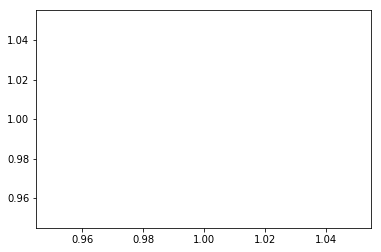

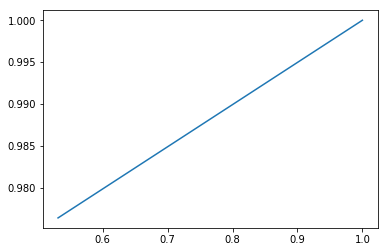

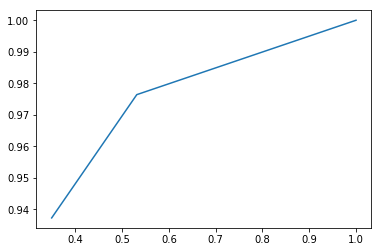

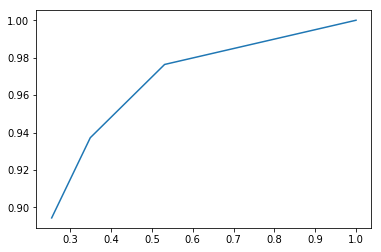

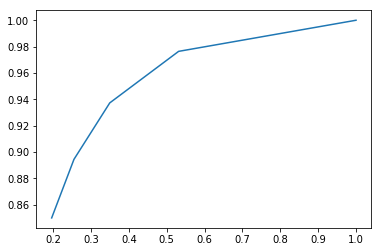

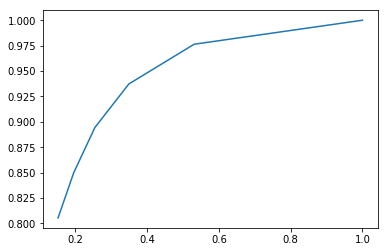

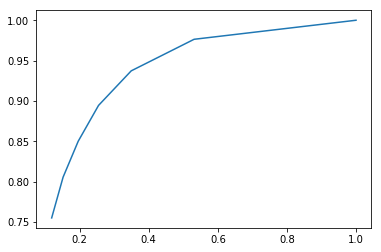

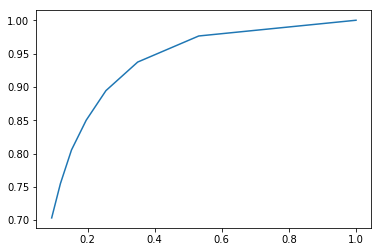

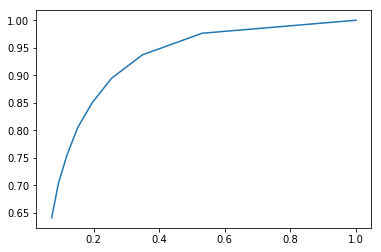

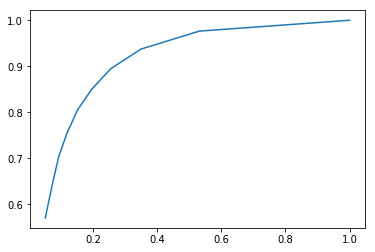

AUC for Threshold value  0.7 is 0.8828327556486157


In [185]:
roc_curv(logistic_reg)

In [204]:
def roc_curv2(knnmodel):
    num_threshold = 10
    n = np.shape(ytest)[0]
    t,f = [],[]
    threshold = np.linspace(0, 0.7, num_threshold)
    pred_proba = knnmodel.predict_proba(xtest)[:,1]
    
    for i in threshold:
        
        current_t = sum(((pred_proba >= i) == True) & (ytest == 1)) / sum(ytest)
        current_f = sum((pred_proba >= i) & (ytest == 0)) / sum(ytest == 0)
        t.append(current_t)
        f.append(current_f)
        fig, ax = plt.subplots()
        plt.plot(f, t)  
        plt.show()
        
    print("AUC for threshold:", i,  "is", auc(f, t))

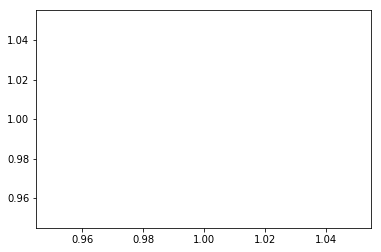

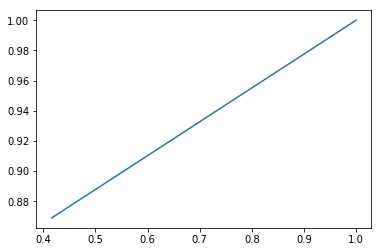

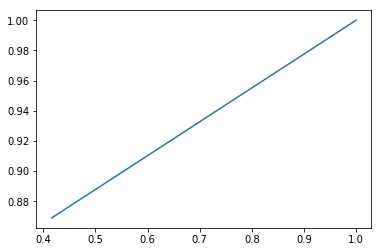

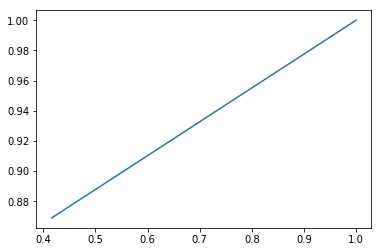

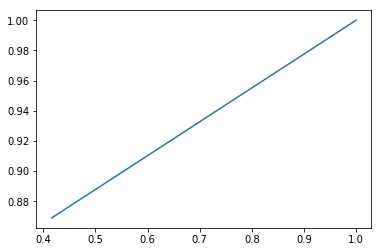

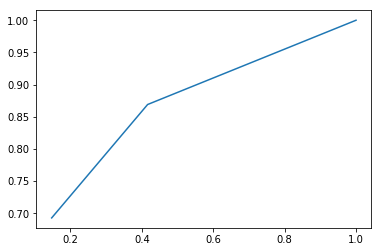

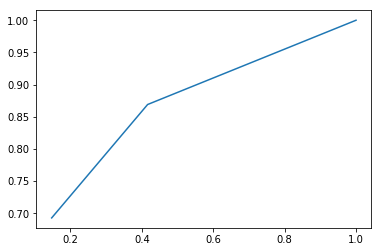

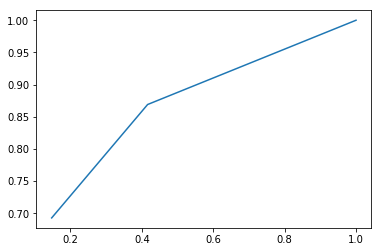

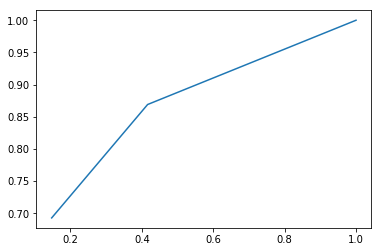

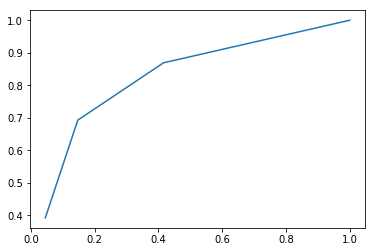

AUC for threshold: 0.7 is 0.8107289067287115


In [205]:
roc_curv2(knn3)

Log model has a greater area under the curve as compared to Knn model

### How large a role does country play

Log Model

In [207]:
log_pred=logistic_reg.predict(xtest1)
print(classification_report(ytest1,log_pred))

             precision    recall  f1-score   support

          0       0.85      0.89      0.87     15145
          1       0.80      0.73      0.76      8636

avg / total       0.83      0.83      0.83     23781



In [208]:
perf_measure(log_pred,ytest1)

Results:
----------------------------
Accuracy: 83.46 %
Precision: 79.56 %
Recall: 73.26 %
F1 Score: 76.28 %


In [213]:
#removing all columns starting with country
col_without_country=[column for column in xtrain1.columns if not(column.lower().startswith('country'))]

#https://www.programiz.com/python-programming/methods/string/startswith

In [216]:
xtrain_nodummies=xtrain1[col_without_country]
xtest_nodummies=xtest1[col_without_country]

In [221]:
#prediction without dummies
log_model_without_dummies=LogisticRegression()
log_model_without_dummies.fit(xtrain_nodummies,ytrain1)
log_pred_no_dummies=log_model_without_dummies.predict(xtest_nodummies)
print(perf_measure(log_pred_no_dummies,ytest1))

Results:
----------------------------
Accuracy: 83.15 %
Precision: 79.14 %
Recall: 72.78 %
F1 Score: 75.82 %
None


removal of dummies did not have a significant effect in accuracy as it is nearpy the same in both the cases

### Removing Highly correlated variables

In [234]:
high_cor_columns=['V205', 'V203', 'V207', 'V203A', 'V206']
xtrain_no_dummies_no_corr=xtrain_nodummies.drop(high_cor_columns, axis=1)

xtest_no_dummies_no_corr=xtest_nodummies.drop(high_cor_columns, axis=1)





In [236]:
log_reg_without_dummies_and_no_cor=LogisticRegression()
log_reg_without_dummies_and_no_cor.fit(xtrain_no_dummies_no_corr,ytrain1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [238]:
pred_log_no_dummies_no_cor=log_reg_without_dummies_and_no_cor.predict(xtest_no_dummies_no_corr)

In [239]:
perf_measure(pred_log_no_dummies_no_cor,ytest1)

Results:
----------------------------
Accuracy: 79.37 %
Precision: 74.59 %
Recall: 65.48 %
F1 Score: 69.74 %


We see that there is a reduction in accuracy by less than 5% after removing the dummies and the highly correlated columns